   customer_id     customer_name     country           city
0         9780      Jessica Hart  Martinique  South William
1         9169         Amy Clark  Kazakhstan     Davisville
2         6631  Danielle Elliott     Armenia     East Danny
3         8772     Robin Mendoza      Uganda    Johnsonbury
4         8913    Abigail Miller     Namibia  Wrightchester
   order_id  customer_id  product_id           product_name product_category  \
0         1         1731        8609  Central home & kitche   Home & Kitchen   
1         2         5539        2409             Upon sport           Sports   
2         3         3507        1145       Across stationer       Stationery   
3         4         4826        8375    Start home & kitche   Home & Kitchen   
4         5         6538        2149             Draw beaut           Beauty   

  payment_type  qty  price             datetime ecommerce_website_name  \
0       Wallet   25  64216  2021-07-26T20:16:14        www.bestbuy.com   
1         C

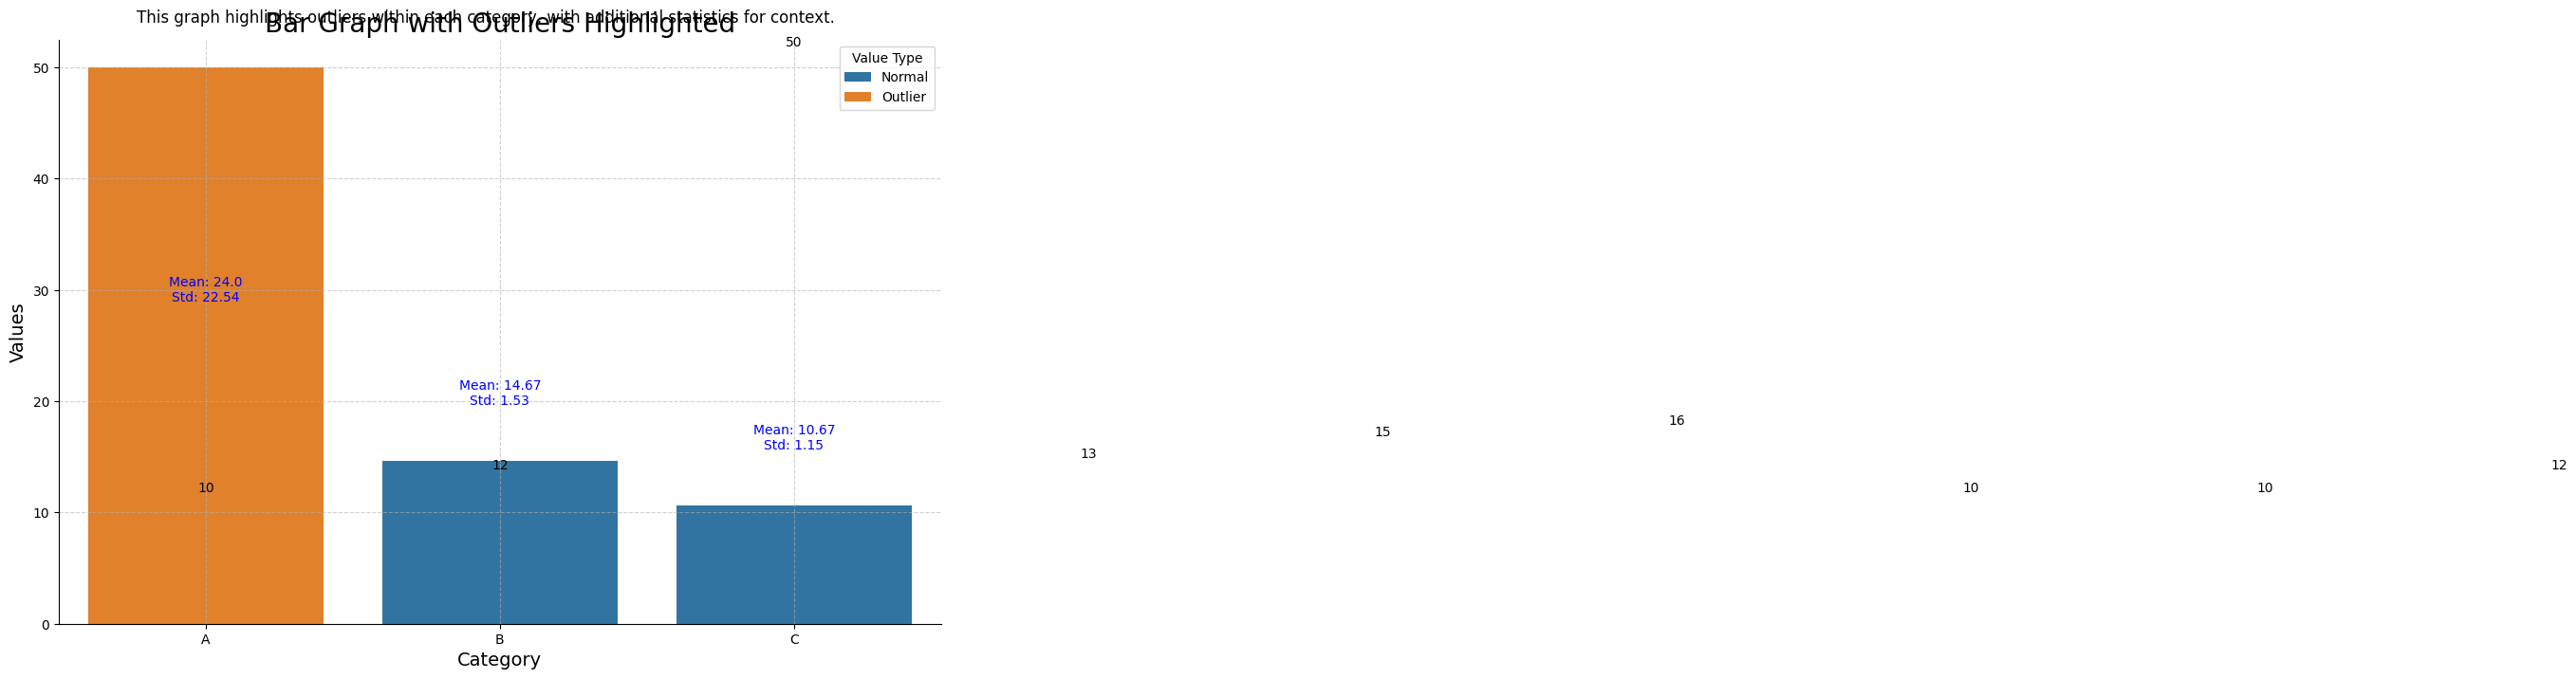

In [1]:

import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load customers.json
with open('customers.json', 'r') as file:
    customers_data = json.load(file)
customers_df = pd.DataFrame(customers_data)

# Load transaction_logs.json
with open('transaction_logs.json', 'r') as file:
    transaction_logs_data = json.load(file)
transaction_logs_df = pd.DataFrame(transaction_logs_data)

# Check the first few rows of each DataFrame
print(customers_df.head())
print(transaction_logs_df.head())

# Summary of the data
print(customers_df.info())
print(transaction_logs_df.info())

# Data types and column names
print(customers_df.dtypes)
print(transaction_logs_df.dtypes)

# Describe numerical and categorical columns
print(customers_df.describe(include='all'))
print(transaction_logs_df.describe(include='all'))

# Identify key columns in each DataFrame
print("Customer Data Columns:", customers_df.columns.tolist())
print("Transaction Logs Columns:", transaction_logs_df.columns.tolist())

# Check for missing values
print(customers_df.isnull().sum())
print(transaction_logs_df.isnull().sum())

# Sample data for visualization
data = pd.DataFrame({
    'Category': ['A', 'A', 'A', 'B', 'B', 'B', 'C', 'C', 'C'],
    'Values': [10, 12, 50, 13, 15, 16, 10, 10, 12]  # Assume 50 is an outlier
})

# Function to highlight outliers
def highlight_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data['Outlier'] = (data[column] < lower_bound) | (data[column] > upper_bound)
    return data

# Highlight outliers in the data
highlighted_data = highlight_outliers(data, 'Values')

# Add hue to differentiate between normal values and outliers
highlighted_data['Hue'] = highlighted_data['Outlier'].map({True: 'Outlier', False: 'Normal'})

# Calculate additional statistics
category_stats = highlighted_data.groupby('Category')['Values'].agg(['mean', 'std']).reset_index()

# Create the bar graph with highlighted outliers
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Values', hue='Hue', data=highlighted_data,
            palette={'Normal': '#1f77b4', 'Outlier': '#ff7f0e'}, errorbar=None, dodge=False)

# Annotate each bar with values
for index, row in highlighted_data.iterrows():
    plt.text(index, row['Values'] + 0.5, f"{round(row['Values'], 2)}\n", 
             color='black', ha="center", fontsize=10)

# Annotate with mean and std deviation
for index, row in category_stats.iterrows():
    plt.text(index, row['mean'] + 5, f"Mean: {round(row['mean'], 2)}\nStd: {round(row['std'], 2)}", 
             color='blue', ha="center", fontsize=10)

# Add title and labels
plt.title('Bar Graph with Outliers Highlighted', fontsize=20)
plt.suptitle('This graph highlights outliers within each category, with additional statistics for context.', fontsize=12, y=0.92)
plt.ylabel('Values', fontsize=14)
plt.xlabel('Category', fontsize=14)

# Enhance the grid and spines
plt.grid(True, linestyle='--', alpha=0.6)
sns.despine()

# Add a legend
plt.legend(title='Value Type')

# Show the plot
plt.show()